In [36]:
import torch
from PIL import Image

In [170]:
img_tensor = torch.load("/home/yura/Computer_Vision_LAB/Semantic_Segmentation/BEiT-CUBOX/beit/semantic_segmentation/wok_930_03_wiredense_0_0.pt").cpu()[0]

In [ ]:
img_tensor

In [24]:
class Denormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        new_tensor = torch.zeros_like(tensor)
        # RGB
        for i, (t, m, s) in enumerate(zip(tensor, self.mean, self.std)):
            new_tensor[i] = (t * s) + m
        return tensor

In [25]:
denormalizer = Denormalize([123.675, 116.28, 103.53], [58.395, 57.12, 57.375])
denorm_img_tensor = denormalizer(img_tensor)

In [58]:
attn_tensor = torch.load("/home/yura/Computer_Vision_LAB/Semantic_Segmentation/BEiT-CUBOX/beit/semantic_segmentation/wok_930_03_wiredense_attn_0_0.pt").cpu()[0]

<AxesSubplot:>

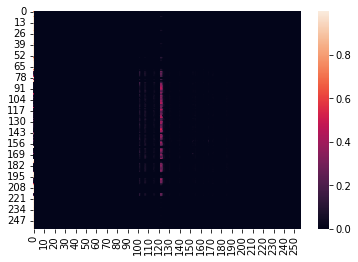

In [97]:
import seaborn as sns
sns.heatmap(attn_tensor[10])

<AxesSubplot:>

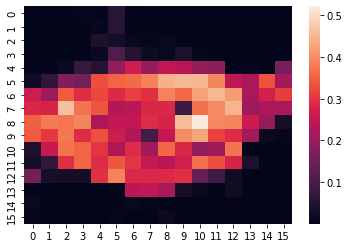

In [169]:
sns.heatmap(attn_tensor[10, :, 122][1:].reshape(16, 16))

In [6]:
from PIL import ImageDraw

def draw_rec(img, p):
    h, w = p//16, p % 16
    h, w = h*16, w*16
    draw = ImageDraw.Draw(img)
    draw.rectangle(((h, w), (h + 16, w + 16)), outline=(255, 0, 0))

    return img

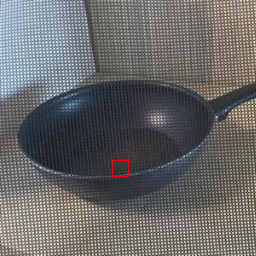

In [128]:
inverted_denorm_img

In [120]:
import numpy as np

inverted_arr = np.uint8(inverted_denorm_img)

In [187]:
from torchvision.transforms import ToPILImage, ToTensor
import PIL

def recover_img(img_tensor_path):
    img_tensor = torch.load(img_tensor_path).cpu()
    to_pil = ToPILImage()
    img_tensor = denormalizer(img_tensor)
    img_pil = to_pil(img_tensor)
    img_pil = PIL.ImageOps.invert(img_pil)

    return img_pil

In [199]:
BASE_DIR = "/home/yura/Computer_Vision_LAB/Semantic_Segmentation/BEiT-CUBOX/beit/semantic_segmentation"

In [201]:
attn_tensor = torch.load(f"{BASE_DIR}/test_attn_tensor/wok_930_03_wiredense_0_0/attention.pt")

In [213]:
attn_tensor.shape

torch.Size([12, 257, 257])

In [214]:
def draw_heatmap(tensor):
    sns.heatmap(tensor)


In [218]:
import matplotlib.pyplot as plt
def show_heatmap(attn_tensor, L):
    for i in range(1, 3):
        # hm = sns.heatmap(attn_tensor[:, i][1:].reshape((16, 16)))
        plt.clf()
        draw_heatmap(attn_tensor[:, i][1:].reshape((16, 16)))


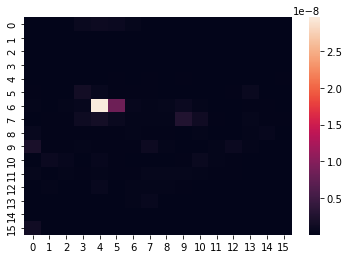

In [219]:
H, L, L = attn_tensor.shape
for h in range(H):
    show_heatmap(attn_tensor[h], L)
    break

In [3]:
from PIL import Image
BASE_DIR = "/home/yura/Computer_Vision_LAB/Semantic_Segmentation/BEiT-CUBOX/beit/semantic_segmentation"
aif_img = Image.open(f"{BASE_DIR}/test_attn_map/airfryer_930_02_none_0_1/cropped_img.jpg")

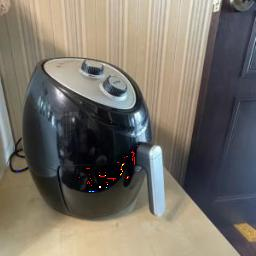

In [4]:
aif_img

In [10]:
draw_rec(aif_img, 41).save(f"{BASE_DIR}/aif.jpg")

In [12]:
wok_img = Image.open(f"{BASE_DIR}/test_attn_map/wok_930_03_wiredense_0_0/cropped_img.jpg")

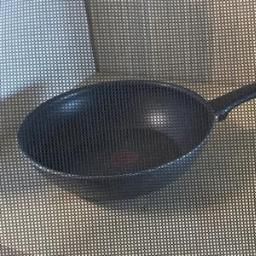

In [13]:
wok_img